In [1]:
"""
Landon Buell
Adapted from A. Geron
'Hands on Machine Learning' - Ch.3
1 December 2019
"""

            #### IMPORTS ####
    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import sklearn.model_selection as model
import sklearn.metrics as metrics


In [2]:
        #### COLLECT MNIST DATA ####
    
mnist = fetch_openml('mnist_784',version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])


In [3]:
        #### ISOLATE DATA SETS ####

X_data,Y_data = mnist['data'],mnist['target']

print("X_Data shape:",np.shape(X_data))
print("Y_Data shape:",np.shape(Y_data))

# 70,000 images, each has 784 pixels
# Each image is 28x28 

Y_data = Y_data.astype(np.uint8)

X_Data shape: (70000, 784)
Y_Data shape: (70000,)


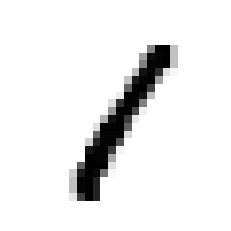

Image Labeled as: 1


In [4]:
            #### EXTRACT IMAGE AND VISUALIZE IT ####
idx = 3
digit = X_data[idx]
image = digit.reshape(28,28)

plt.imshow(image,cmap=cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

print("Image Labeled as:",Y_data[idx])

In [5]:
            #### DIVIDE INTO TRAINING & TESTING DATA SETS ####
    
X_train,X_test = X_data[:68000],X_data[68000:]
Y_train,Y_test = Y_data[:68000],Y_data[68000:]

# data is already shuffled approriately
# All K-Folds cross-val test will be similar

# Find all  indexes label w/ a desired digit

target_digit = 4

Y_train_target = (Y_train == target_digit)
Y_test_target = (Y_test == target_digit)

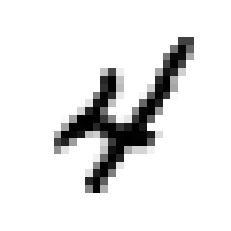

Image Labeled as: 4
Image is a 4: [ True]


In [6]:
            #### BUILDING A BINARY CLASSIFIER ####

clf_3 = SGDClassifier(random_state=0)
clf_3.fit(X_train,Y_train_target)

          #### EXTRACT IMAGE AND VISUALIZE IT ####
idx = 9
digit = X_data[idx]
image = digit.reshape(28,28)

plt.imshow(image,cmap=cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

print("Image Labeled as:",Y_data[idx])

# use trained classifier to predict image above
val = clf_3.predict([digit])
print("Image is a 4:",val)

In [7]:
        #### TESTING ON SOME RANDOM INDICIES ####
    
idxs = np.random.randint(0,2000,20)

digits = X_test[idxs]#.reshape(784,10)
labels = Y_test[idxs]
predicts = clf_3.predict(digits)

print("Labels:\n",labels)
print("Predictions\n",predicts)
    

Labels:
 [1 3 6 5 0 7 1 7 3 8 0 4 0 6 1 8 3 0 5 4]
Predictions
 [False False False False False False False False False False False  True
 False False False False False False False  True]


In [8]:
for I in range(0,4):
    image = digits[I].reshape(28,28)
    plt.figure(figsize=(4,4))
    plt.imshow(image,cmap=cm.binary,interpolation='nearest')
    plt.axis("off")
    plt.savefig('Image_'+str(I)+'.png')
    plt.close()


In [9]:
        #### TESTING PERFORMANCE OF CLASSIFIER ####
    
Y_train_prediction = model.cross_val_predict(clf_3,X_train,Y_train_target,cv=3)

conf_mat = metrics.confusion_matrix(Y_train_target,Y_train_prediction)
print("Confusion Matrix:\n",conf_mat)

precision = metrics.precision_score(Y_train_target,Y_train_prediction)
recall = metrics.recall_score(Y_train_target,Y_train_prediction)
f1_sc = metrics.f1_score(Y_train_target,Y_train_prediction)

print("")
print("Precision Score",precision)
print("Recall Score",recall)
print("F1 Score:",f1_sc)

Confusion Matrix:
 [[60813   557]
 [ 1005  5625]]

Precision Score 0.9098997088320931
Recall Score 0.8484162895927602
F1 Score: 0.8780830471433032
